# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [282]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

## String date array to Date format array

In [283]:
def stringArr_to_dateArr(stringArr):
  return  [datetime.strptime(str(day[0]), '%d/%m/%Y').date() for day in stringArr]

### Importing the training set

In [284]:
dataset_train = pd.read_csv('https://raw.githubusercontent.com/iresh-rajitha/RNN-PCR_Prediction/main/Train.csv') # order here is future to past
dataset_train = dataset_train[::-1] # to reverse the order past to future


## Generate training date array to plot training data

In [285]:
training_set = dataset_train.iloc[:, 1:2].values
days = dataset_train.iloc[:, 0:1].values

formated_days = stringArr_to_dateArr(days)

## Plot Training dataset

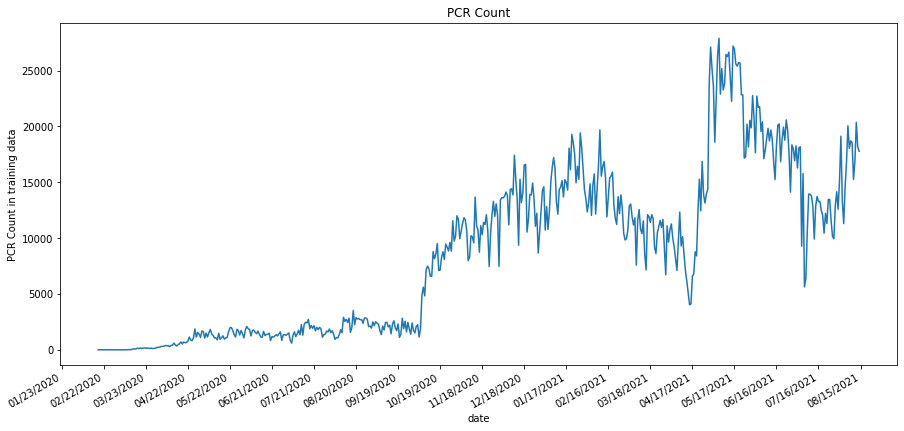

In [286]:
plt.subplots(figsize = (15,7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.plot(formated_days, training_set)
# plt.rcParams['font.size'] = '15'
plt.title('PCR Count')
plt.ylabel('PCR Count in training data')
plt.xlabel('date')
plt.gcf().autofmt_xdate()

### Feature Scaling

In [287]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [288]:
X_train = []
y_train = []
for i in range(60, 544):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [289]:
X_train.shape

(484, 60)

### Reshaping

In [290]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [291]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [292]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [293]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [294]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [295]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [296]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [297]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [298]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [299]:
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
16/16 [==============================] - 7s 106ms/step - loss: 0.0593
Epoch 2/100
16/16 [==============================] - 2s 115ms/step - loss: 0.0231
Epoch 3/100
16/16 [==============================] - 2s 105ms/step - loss: 0.0189
Epoch 4/100
16/16 [==============================] - 2s 104ms/step - loss: 0.0188
Epoch 5/100
16/16 [==============================] - 2s 106ms/step - loss: 0.0147
Epoch 6/100
16/16 [==============================] - 2s 108ms/step - loss: 0.0138
Epoch 7/100
16/16 [==============================] - 2s 103ms/step - loss: 0.0123
Epoch 8/100
16/16 [==============================] - 2s 103ms/step - loss: 0.0128
Epoch 9/100
16/16 [==============================] - 2s 105ms/step - loss: 0.0126
Epoch 10/100
16/16 [==============================] - 2s 108ms/step - loss: 0.0132
Epoch 11/100
16/16 [==============================] - 2s 113ms/step - loss: 0.0104
Epoch 12/100
16/16 [==============================] - 2s 103ms/step - loss: 0.0107
Epoch 13/100


## Plot losses of trained RNN

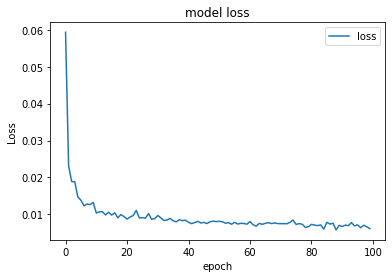

In [300]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper right')
plt.show()

## Part 3 - Making the predictions and visualising the results

### Getting the Test set


In [301]:
dataset_test = pd.read_csv('https://raw.githubusercontent.com/iresh-rajitha/RNN-PCR_Prediction/main/Test.csv')
dataset_test = dataset_test[::-1]
real_pcr_count = dataset_test.iloc[:, 1:2].values



## Test data's dates to plot Final Result

In [302]:
days = dataset_test.iloc[:, 0:1].values
formated_days_test = stringArr_to_dateArr(days)

### Getting the predicted PCR Test 

In [303]:
dataset_total = pd.concat((dataset_train['pcr_count'], dataset_test['pcr_count']), axis = 0)


In [304]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 :].values


In [305]:
inputs = inputs.reshape(-1,1)

In [306]:
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 90):
    X_test.append(inputs[i-60 :i , 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [307]:
predicted_pcr_count = regressor.predict(X_test)
predicted_pcr_count = sc.inverse_transform(predicted_pcr_count)

### Visualising the results

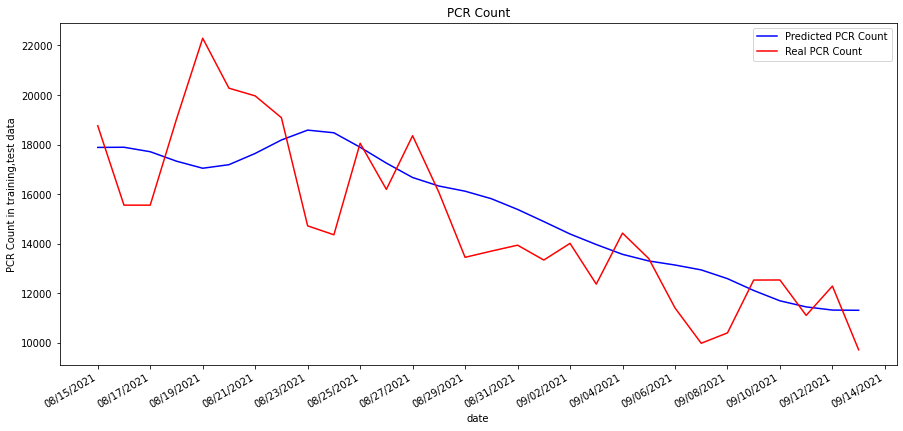

In [308]:
plt.subplots(figsize = (15,7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.plot(formated_days_test,predicted_pcr_count, color = 'blue', label = 'Predicted PCR Count')
plt.plot(formated_days_test,real_pcr_count, color = 'red', label = 'Real PCR Count')
plt.legend()
plt.rcParams['font.size'] = '10'
plt.title('PCR Count')
plt.ylabel('PCR Count in training,test data')
plt.xlabel('date')
plt.gcf().autofmt_xdate()